In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import e
import time
from sympy import *
from matplotlib import cm
from scipy.interpolate import approximate_taylor_polynomial
from scipy import optimize

In [2]:
# 1
'''
Изобразить график функции
В окрестностях указанных точек построить приближения Тейлора 1-3 порядков
График функции - сплошной линией
Приближения - тонкой сплошной, пунктирной и точечной линиями
Написать формулы каждой из линий 
'''

'\nИзобразить график функции\nВ окрестностях указанных точек построить приближения Тейлора 1-3 порядков\nГрафик функции - сплошной линией\nПриближения - тонкой сплошной, пунктирной и точечной линиями\nНаписать формулы каждой из линий \n'

C:\Users\Thunboo\AppData\Local\Temp\ipykernel_5860\1498627223.py:5: RuntimeWarning: divide by zero encountered in divide
  y = x/(1-x)
C:\Users\Thunboo\AppData\Local\Temp\ipykernel_5860\1498627223.py:3: RuntimeWarning: divide by zero encountered in divide
  return x/(1-x)


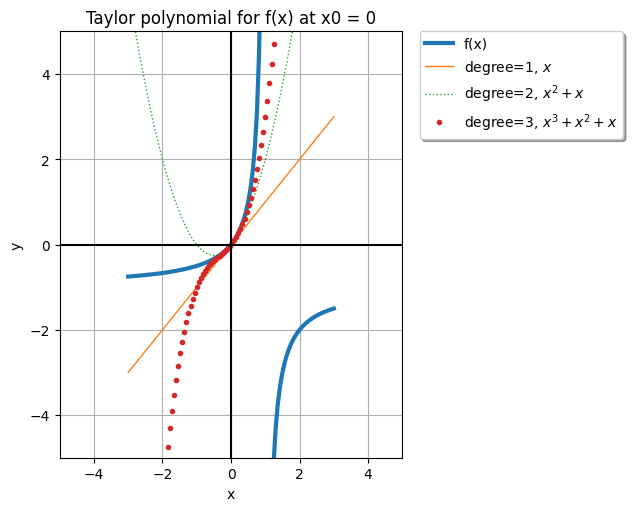

In [35]:
# 1.5
def f(x):
    return x/(1-x)
x = np.linspace(-3,3,100)
y = x/(1-x)
x0s = [0, -1]
s = ['-',':','.']
cnt = 0
# f' = 1 / (1-x)^2 <=> f' = (1-x)^-2
# f'' = -2 * (1-x)^-3 => f''' = 6 * (1-x)^-4
# f^(n) = n! * (1-x)^-(n+1)
xs = symbols('x')
ys = 0*xs

'''
>>> approximate_taylor_polynomial(f, x, degree, scale, order=None)
f - функция, для которой ищется многочлен Тейлора
x - скаляр, точка, в которой рассчитывается многочлен
degree - целое, степень многочлена Тейлора
scale - скаляр, ширина интервала, используемая для расчета многочлена Тейлора
order - целое/None, опциональный параметр, степень многочлена,
        используемого для подгонки. При None -> = degree

        
    notebook = open('t1.txt','a')
    for i in range(len(x)):
        notebook.write(f"| {x[i]:2.2f} | {f(x)[i]:2.2f} |\n")
    notebook.write("------------------------")
    notebook.close()
'''
plt.plot(x, f(x), linewidth=3, label="f(x)")
for x0 in x0s:
    if  x0 == -1: break
    y_n = x0/(1 - x0)
    cnt = 0
    for degree in range(1,4,1):
        y_n = y_n + ((1-x0)**(-degree - 1))*(x-x0)**(degree)
        ys  = ys  + (xs-x0)**(degree)
        plt.plot(x, y_n, s[cnt], linewidth=1.0, label=f'degree={degree}, ${str(ys).replace("**","^")}$')
        cnt += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-5,5, -5,5])
plt.title('Taylor polynomial for f(x) at x0 = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()



C:\Users\Thunboo\AppData\Local\Temp\ipykernel_5860\1498627223.py:3: RuntimeWarning: divide by zero encountered in divide
  return x/(1-x)


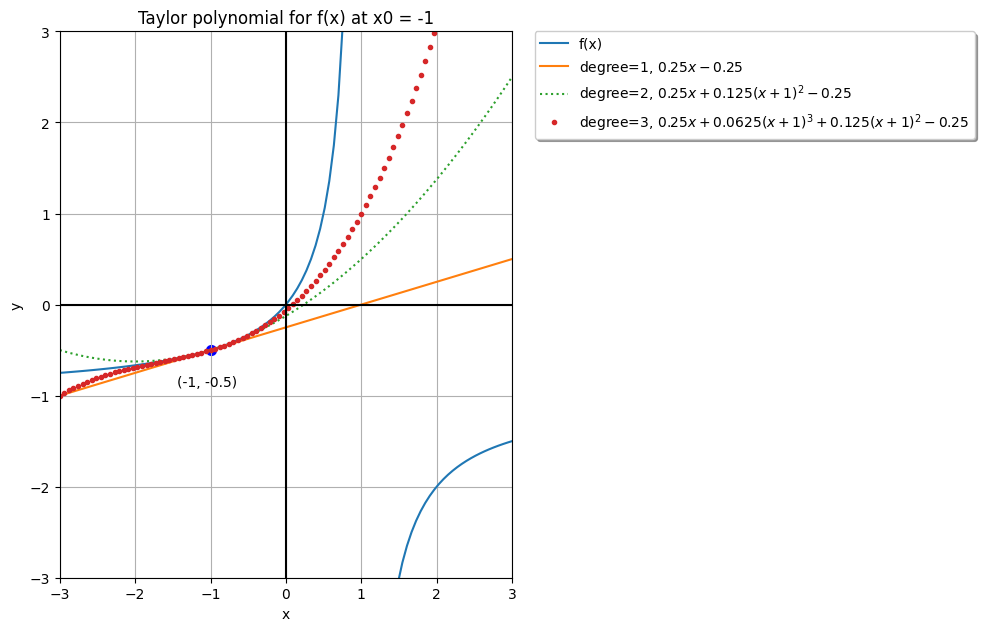

In [41]:
ys = -0.5 + 0*xs
plt.figure(figsize=(10,6))
plt.plot(x, f(x), label="f(x)")
for x0 in x0s:
    if  x0 == 0: continue
    y_n = x0/(1 - x0)
    cnt = 0
    for degree in range(1,4,1):
        y_n = y_n + ((1-x0)**(-degree - 1))*(x-x0)**(degree)
        ys  = ys  + (0.5**(degree + 1))*(xs-x0)**(degree)
        plt.plot(x, y_n, s[cnt], label=f'degree={degree}, ${str(ys).replace("**","^").replace("*","")}$')
        cnt += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
plt.scatter(-1, -1/2, s=50, color='blue')
plt.text(-1 - 0.45, -1/2 - 0.4, "(-1, -0.5)")
plt.tight_layout()
plt.axis([-3,3, -3,3])
plt.title('Taylor polynomial for f(x) at x0 = -1')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()


C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10124\3601085448.py:5: RuntimeWarning: divide by zero encountered in divide
  y = (x**3 + 2*x**2)/(x-2)
C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10124\3601085448.py:9: RuntimeWarning: divide by zero encountered in divide
  y = (x**3 + 2*x**2)/(x-2)


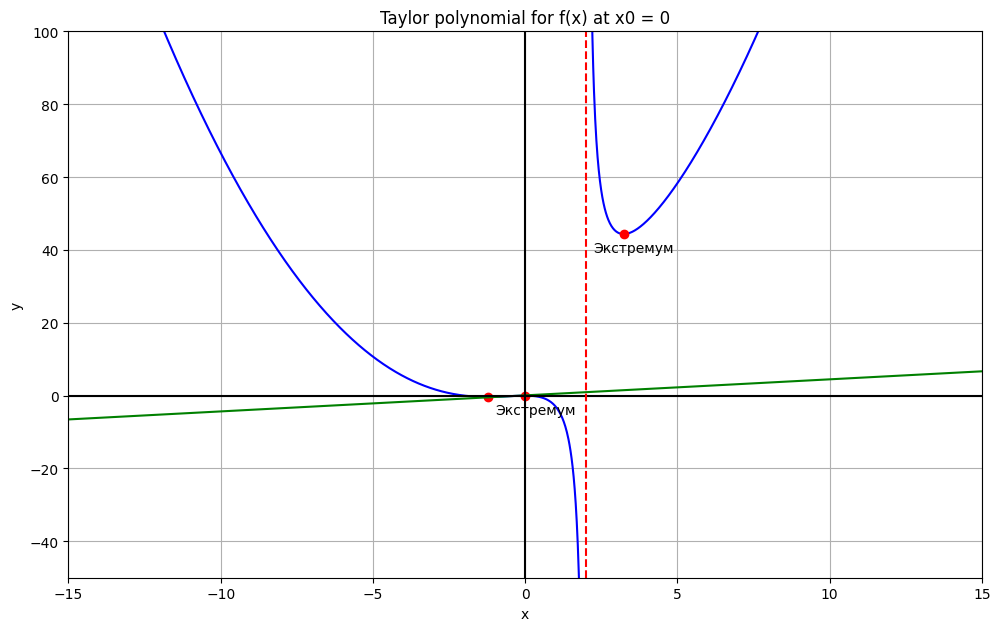

y = 0 : x = [-2, 0]
y' = 0 : x = [0, 1 - sqrt(5), 1 + sqrt(5)]
y'' = 0 : x = [2 - 2*2**(1/3)]

Значения функции в точках экстремума:
x = 0, y(0) =~ 0
x = 1 - sqrt(5), y(1 - sqrt(5)) =~ -0.360679774997897
x = 1 + sqrt(5), y(1 + sqrt(5)) =~ 44.3606797749979

Значение функции в точке перегиба:
x = 2 - 2*2**(1/3), y(2 - 2*2**(1/3)) =~ -0.158736798317971

Значение тангенса угла наклона касательной в точке перегиба:
x = 2 - 2*2**(1/3), y'(2 - 2*2**(1/3)) =~ 0.440473700630761

     ⎛ 3      2⎞
     ⎜x  + 2⋅x ⎟
 lim ⎜─────────⎟
x─→2⁻⎝  x - 2  ⎠
 = -oo

     ⎛ 3      2⎞
     ⎜x  + 2⋅x ⎟
 lim ⎜─────────⎟
x─→2⁺⎝  x - 2  ⎠
 = oo

Вертикальная асимптота: x = 2


In [37]:
# 2.5
plt.figure(figsize=(10,6))

x = np.linspace(-15,2, 1000)
y = (x**3 + 2*x**2)/(x-2)
plt.plot(x,y, 'b')

x = np.linspace(2,15, 1000)
y = (x**3 + 2*x**2)/(x-2)
plt.plot(x,y, 'b')


x = symbols('x')
y = (x**3 + 2*x**2)/(x-2)
y_d = y.diff()
y_dd = y_d.diff()

for x0 in solve(y_d,x):
    plt.plot(x0, y.subs(x, x0).evalf(), 'or')
    if x0 == solve(y_d,x)[1]: continue
    plt.text(x0 - 1, y.subs(x, x0).evalf() - 5, "Экстремум")
x0 = solve(y_dd, x)[0]
y0 = y.subs(x,x0).evalf()
k = y_d.subs(x,x0).evalf()
x = np.linspace(-15,15,100)
plt.plot(x, k*(x - x0) + y0, color='green')

plt.tight_layout()
plt.axis([-15,15, -50,100])
plt.title('Taylor polynomial for f(x) at x0 = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axvline(x=2, color='r', linestyle='--')
plt.grid()
plt.show()

x = symbols('x')
y = (x**3 + 2*x**2)/(x-2)
y_d = y.diff()
y_dd = y_d.diff()
print(f'y = 0 : x = {solve(y,x)}')   # Корни исходной функции
print(f"y' = 0 : x = {solve(y_d,x)}") # Корни производной функции
print(f"y'' = 0 : x = [{solve(y_dd,x)[0]}]")# Корни второй производной функции
print()

print("Значения функции в точках экстремума:")
for x0 in solve(y_d,x):
    print(f"x = {x0}, y({x0}) =~ {y.subs(x, x0).evalf()}")
print()

print("Значение функции в точке перегиба:")
print(f"x = {solve(y_dd,x)[0]}, y({solve(y_dd,x)[0]}) =~ {y.subs(x, solve(y_dd,x)[0]).evalf()}")
print()

print("Значение тангенса угла наклона касательной в точке перегиба:")
print(f"x = {solve(y_dd,x)[0]}, y'({solve(y_dd,x)[0]}) =~ {y_d.subs(x, solve(y_dd,x)[0]).evalf()}")
print()

a_neg = limit(y,x,2, dir='-')
a_pos = limit(y,x,2, dir='+')
pprint(Limit(y,x,2,dir='-'))
print(f" = {a_neg}")
print()
pprint(Limit(y,x,2,dir='+'))
print(f" = {a_pos}")
print()

print("Вертикальная асимптота: x = 2")